# 🔹 Superstore  Report 🔹

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

🔹Step 1: Load the dataset

In [32]:
df = pd.read_csv("Superstore.csv")

🔹Step 2: Searching

In [41]:
print("Shape of dataset:", df.shape)
print("\nColumn Names:-\n", df.columns)
print("\nData Types:-\n", df.dtypes)
print("\nMissing Values:-\n", df.isnull().sum())

Shape of dataset: (9994, 21)

Column Names:-
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Data Types:-
 Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Missing Values:-
 Row ID           0
Order ID         0
Order Date       0
Ship Date     

🔹Step 3:Remove duplicate rows

In [4]:
df = df.drop_duplicates()

In [5]:
# Convert date column if needed
df['Order Date'] = pd.to_datetime(df['Order Date'])

🔹Step 4: Create calculated columns

In [6]:
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100
df['Total_Amount'] = df['Quantity'] * df['Sales']

🔹Step 5: Summary statistics

In [36]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
             Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


🔹Step 6: Exploratory Plots

C:\Users\KARAN SANJAY DUKARE\AppData\Local\Temp\ipykernel_18140\2049719933.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Sales', estimator=sum, ci=None)


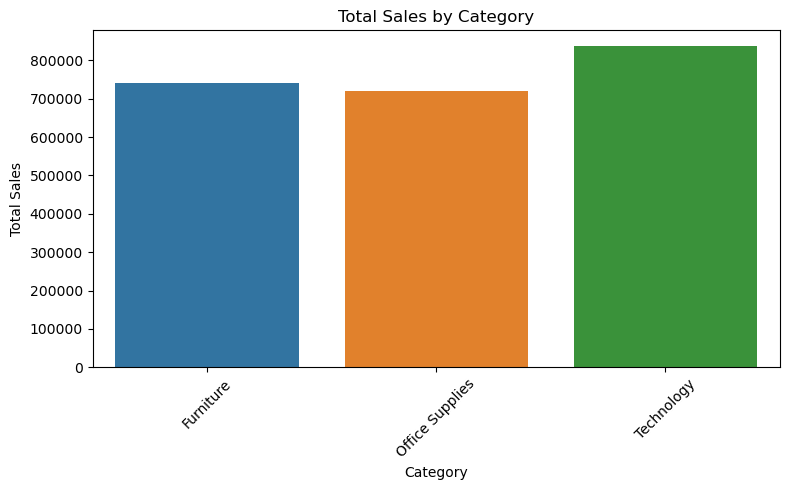

In [8]:
# Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum, ci=None)
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


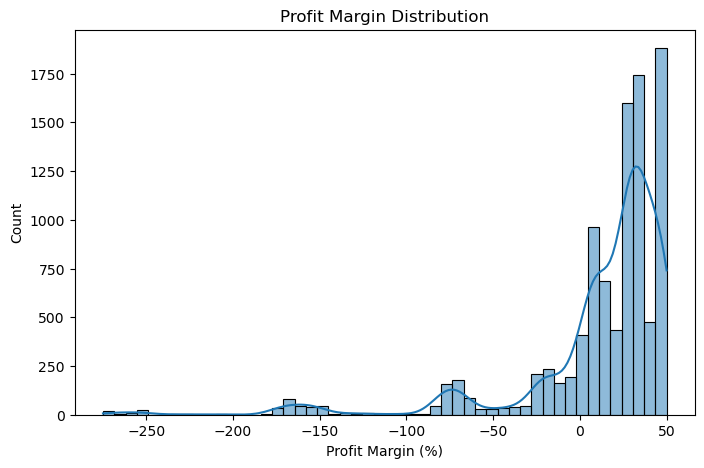

In [9]:
# Profit Margin Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Profit_Margin'], bins=50, kde=True)
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin (%)")
plt.show()

In [10]:
# Sales trend over time
df['Order_Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Order_Month')['Sales'].sum()

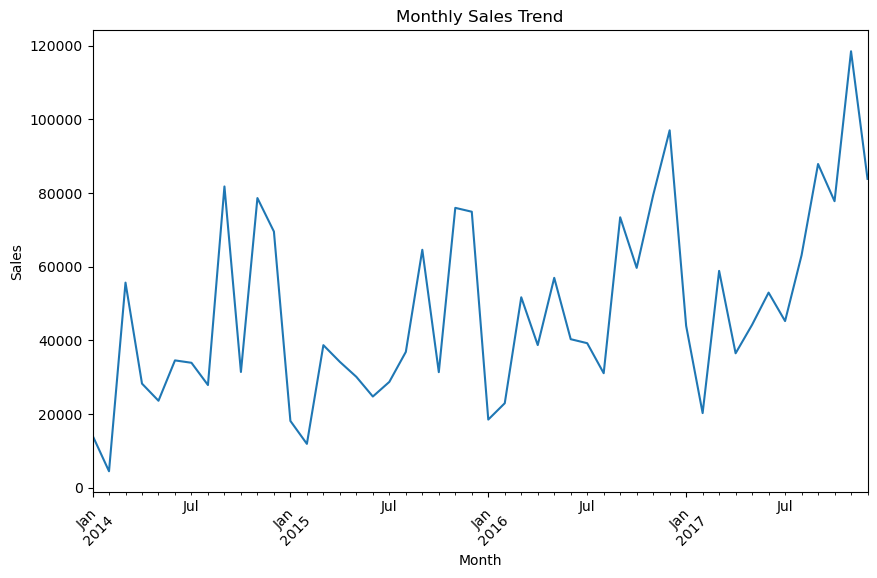

In [11]:
plt.figure(figsize=(10,6))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


🔹Step 7: Top Loss-Making Products

In [12]:
loss_products = df[df['Profit'] < 0].groupby('Product Name')['Profit'].sum().sort_values().head(10)
print("\nTop 10 Loss-Making Products:\n", loss_products)


Top 10 Loss-Making Products:
 Product Name
Cubify CubeX 3D Printer Double Head Print                                     -9239.9692
GBC DocuBind P400 Electric Binding System                                     -6859.3896
Lexmark MX611dhe Monochrome Laser Printer                                     -5269.9690
GBC Ibimaster 500 Manual ProClick Binding System                              -5098.5660
GBC DocuBind TL300 Electric Binding System                                    -4162.0336
Cubify CubeX 3D Printer Triple Head Print                                     -3839.9904
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind   -3431.6730
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                      -3107.5272
Ibico EPK-21 Electric Binding System                                          -2929.4845
Bush Advantage Collection Racetrack Conference Table                          -2545.2600
Name: Profit, dtype: float64


🔹Step 8: Correlation heatmap

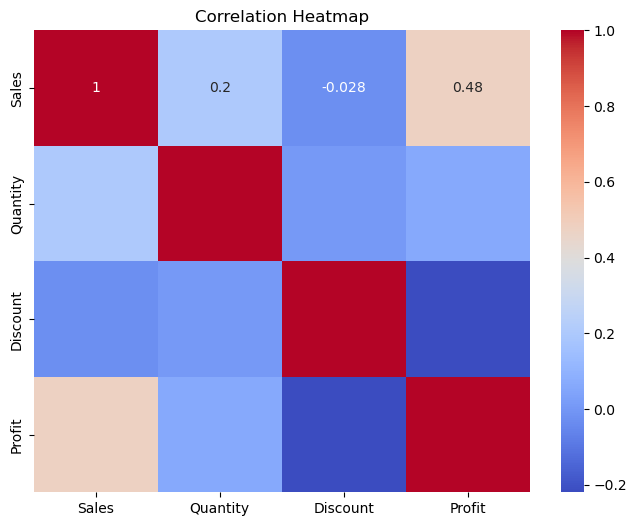

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()